# Run SISEPUEDE for Uganda in this Notebook

Use this notebook to:
- Build input data using best available pipeline data + overwrites from Uganda-specific sources
- Run the model to verify if works
- Do some quick checks

In [ ]:
# can comment out warnings.filterwarnings if you want to see warnings
import warnings
warnings.filterwarnings("ignore")

import sys
dir_git = "/Users/usuario/git/sisepuede"
if dir_git not in sys.path:
    sys.path.append(dir_git)

    
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import pathlib
import sisepuede.core.attribute_table as att
import sisepuede.core.support_classes as sc
import sisepuede.manager.sisepuede_file_structure as sfs
import sisepuede.manager.sisepuede_models as sm
import sisepuede.plotting.plots as spp
import sisepuede.utilities._toolbox as sf
import utils.common_data_needs as cdn
import time
from typing import *

plt.style.use("dark_background", )


logger = None

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   2549.8 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.


In [2]:
importlib.reload(cdn)
dict_ssp = cdn._setup_sisepuede_elements()

matt = dict_ssp.get("model_attributes", )
models = dict_ssp.get("models", )
regions = dict_ssp.get("regions", )
time_periods = dict_ssp.get("time_periods", )

# setup region
_REGION_NAME = "uganda"
_REGION_ISO = regions.return_region_or_iso(_REGION_NAME, return_type = "iso")



## Call _build_from_outputs() to build data using CSVs in `cdn._PATH_OUTPUTS`


In [3]:
cdn._PATH_OUTPUTS

PosixPath('/home/tony-ubuntu/decision_sciences/ssp_uganda_data/data_processing/output_data')

In [4]:
importlib.reload(cdn)
df_uganda = cdn._build_from_outputs(
    (
        min(time_periods.all_years),
        max(time_periods.all_years)
    ),
    fns_exclude = ["frac_lndu_initial.csv"],
    merge_type = "outer", 
    print_info = False,
    stop_on_error = True, 
)



In [5]:
df_uganda

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,yf_agrc_vegetables_and_vines_tonne_ha,...,frac_scoe_heat_energy_commercial_municipal_gasoline,frac_scoe_heat_energy_commercial_municipal_hydrocarbon_gas_liquids,frac_scoe_heat_energy_commercial_municipal_electricity,frac_scoe_heat_energy_commercial_municipal_solid_biomass,frac_scoe_heat_energy_commercial_municipal_coal,frac_scoe_heat_energy_commercial_municipal_natural_gas,frac_scoe_heat_energy_commercial_municipal_hydrogen,deminit_trde_private_and_public_per_capita_passenger_km,deminit_trde_regional_per_capita_passenger_km,time_period
0,0.030468,1.805033,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.002223,...,0.0,0.000000,0.012346,0.987654,0.0,0.0,0.0,2245.495980,43.393178,0
1,0.030468,1.832342,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.070985,...,0.0,0.000000,0.012346,0.987654,0.0,0.0,0.0,2352.897913,45.468671,1
2,0.030468,1.827437,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.007029,...,0.0,0.000000,0.012346,0.987654,0.0,0.0,0.0,2426.772259,46.896259,2
3,0.030468,1.935353,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.014348,...,0.0,0.000000,0.012346,0.987654,0.0,0.0,0.0,2579.635329,49.850267,3
4,0.030468,2.003586,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.035314,...,0.0,0.000000,0.012346,0.987654,0.0,0.0,0.0,2745.852607,53.062340,4
5,0.030468,2.076421,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.013004,...,0.0,0.000000,0.012346,0.987654,0.0,0.0,0.0,2745.852607,53.062340,5
6,0.030468,2.758779,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.023409,...,0.0,0.000000,0.012346,0.987654,0.0,0.0,0.0,2745.852607,53.062340,6
7,0.030468,1.799328,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.030111,...,0.0,0.037594,0.060150,0.902256,0.0,0.0,0.0,2745.852607,53.062340,7
8,0.030468,1.799328,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.030111,...,0.0,0.069204,0.100346,0.830450,0.0,0.0,0.0,2745.852607,53.062340,8
9,0.030468,1.799328,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.030111,...,0.0,0.096154,0.134615,0.769231,0.0,0.0,0.0,2745.852607,53.062340,9


In [5]:
# modvar_exports = matt.get_variable(models.model_enercons.modvar_enfu_exports_fuel)
# modvar_import_frac = matt.get_variable(models.model_enercons.modvar_enfu_frac_fuel_demand_imported)


##  Do a crude timed run
- Verify no errors
- Lets us do some quick exploration

In [11]:
t0 = time.time()

df_run = models.project(df_uganda, )     ##  RUN SISEPUEDE HERE

t_elapse = sf.get_time_elapsed(t0) 

print(f"Time to run: {t_elapse} seconds")

2025-19-Jul 01:27:19.849 Opened SQLite database at /Users/usuario/git/ssp_uganda_data/tmpm2jmse2e.sqlite.
2025-19-Jul 01:27:19.996 Added NEMO structure to SQLite database at /Users/usuario/git/ssp_uganda_data/tmpm2jmse2e.sqlite.
2025-19-Jul 01:27:27.469 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112


2025-19-Jul 01:27:54.555 Finished modeling scenario.
Time to run: 35.73 seconds


<Axes: >

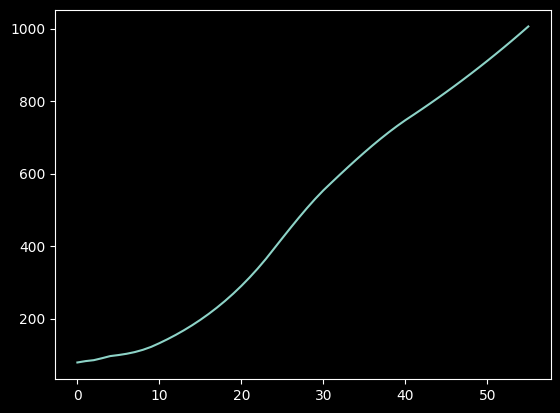

In [12]:
df_tmp["gdp_mmm_usd"].plot()

## Plot emissions stack for quick gut check

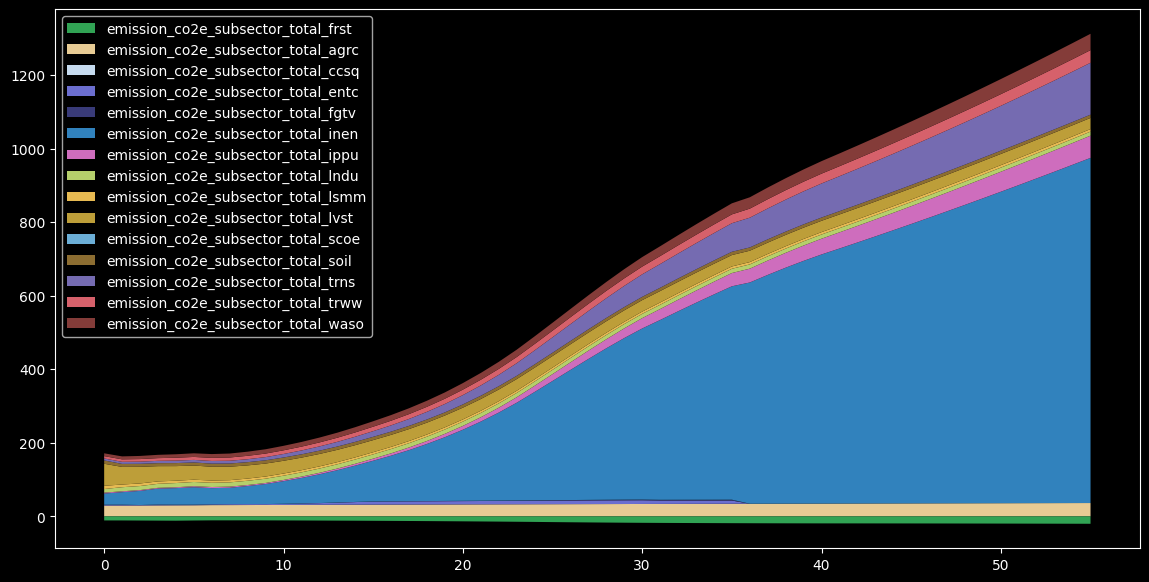

In [13]:
import sisepuede.plotting.plots as spp

fig, ax = plt.subplots(figsize = (14, 7))

spp.plot_emissions_stack(
    df_run,
    matt,
    figtuple = (fig, ax), 
)

ax.legend()



In [ ]:
[x for x in df_run.columns if ("emission_co2e_" in x) and ("scoe" in x)]
df_run[["emission_co2e_co2_scoe_residential"]]

<Axes: xlabel='year'>

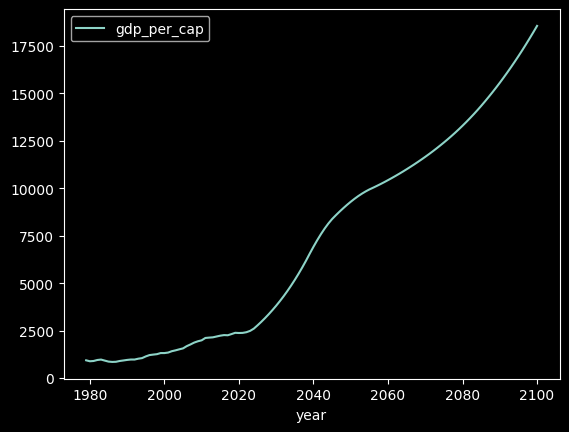

In [145]:
_FIELD_GDP_CAP = "gdp_per_cap"
_FIELD_POP = "population"



df_gdp = pd.read_csv(cdn._PATH_OUTPUTS.joinpath("GDP.csv"))
df_pop = pd.read_csv(cdn._PATH_OUTPUTS.joinpath("POPULATION.csv"))

df_pop[_FIELD_POP] = df_pop[["population_gnrl_rural", "population_gnrl_urban"]].sum(axis = 1, )

df_compare = pd.merge(
    df_gdp,
    df_pop,
    how = "inner",
)


# CWATM @ IIASA (community water model)

df_compare[_FIELD_GDP_CAP] = (10**9)*df_compare["gdp_mmm_usd"].to_numpy()/df_compare[_FIELD_POP].to_numpy()
df_compare[[time_periods.field_year, _FIELD_GDP_CAP]].plot(x = time_periods.field_year, )



In [ ]:
df_uganda = cdn.

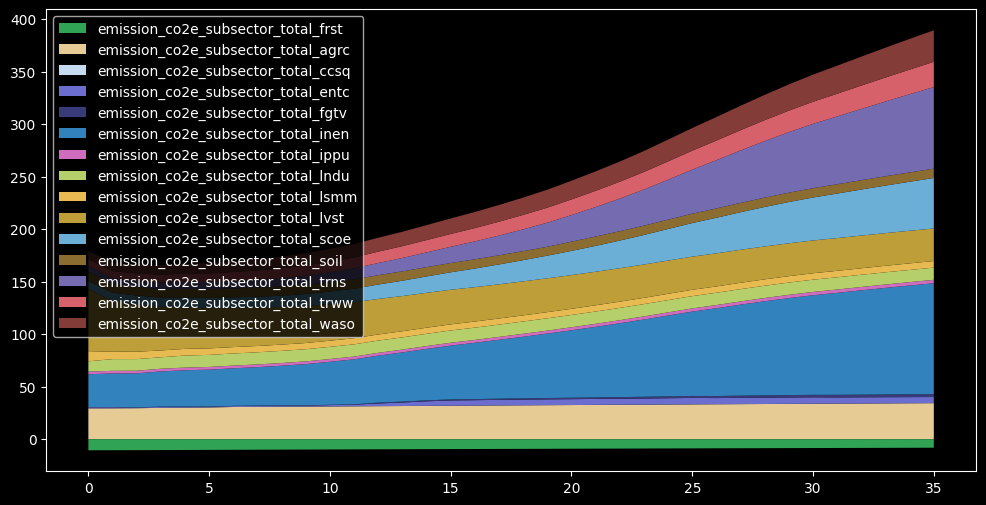

In [143]:
import sisepuede.plotting.plots as spp

fig, ax = plt.subplots(figsize = (12, 6))

spp.plot_emissions_stack(
    df_run,
    matt,
    figtuple = (fig, ax), 
)

ax.legend()

In [24]:
importlib.reload(trf2.sfs.ma)
importlib.reload(trf2.sfs)

<module 'sisepuede.manager.sisepuede_file_structure' from '/Users/usuario/git/sisepuede/sisepuede/manager/sisepuede_file_structure.py'>

In [37]:
import sisepuede.transformers.transformers as trf2
importlib.reload(trf2.tbg)
importlib.reload(trf2)

df_uganda[regions.key] = _REGION_NAME

transformers = trf2.Transformers(
    {},
    attr_time_period = cdn._ATTRIBUTE_TABLE_TIME_PERIOD,
    df_input = df_uganda,
)

In [33]:
#transformers.file_struct.model_attributes.get_dimensional_attribute_table("time_period")

In [38]:
importlib.reload(trf)

<module 'sisepuede.transformers' from '/Users/usuario/git/sisepuede/sisepuede/transformers/__init__.py'>

In [15]:
import sisepuede.transformers.transformers as trf3
importlib.reload(trf3)
transformersa = trf3.Transformers({}, attr_time_period = cdn._ATTRIBUTE_TABLE_TIME_PERIOD, df_input = df_uganda)

magnitude_lurf = None
magnitude_lurf now = 0.0


## some code to setup transformations from git

In [39]:
# based on ssp_uganda_ndc, copied over here
path_transformations = pathlib.Path(os.getcwd()).joinpath("transformations")
df_uganda[regions.key] = _REGION_NAME

# get attribute
import sisepuede.transformers as trf

# NOTE: need to pass the attribute time period to run with a non-default set of time periods
# transformers = trf.Transformers(
#     {},
#     attr_time_period = cdn._ATTRIBUTE_TABLE_TIME_PERIOD,
#     df_input = df_uganda,
# )

# pass attr_time_period and df_input so that config baseline is called
transformations = trf.Transformations(
    path_transformations,
    attr_time_period = cdn._ATTRIBUTE_TABLE_TIME_PERIOD,
    df_input = df_uganda,
    #transformers = transformers,
)

strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)






In [40]:
key = f"{transformations.transformers.key_config_baseline}.{transformations.transformers.key_config_magnitude_lurf}"
transformations.transformers.config.get(
    key, return_on_none = 0.0
)


0.01

In [41]:
strat = transformations.get_transformation("TX:BASE")
df = strat()
df["lndu_reallocation_factor"]

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000233
14    0.000465
15    0.000698
16    0.000930
17    0.001163
18    0.001395
19    0.001628
20    0.001860
21    0.002093
22    0.002326
23    0.002558
24    0.002791
25    0.003023
26    0.003256
27    0.003488
28    0.003721
29    0.003953
30    0.004186
31    0.004419
32    0.004651
33    0.004884
34    0.005116
35    0.005349
36    0.005581
37    0.005814
38    0.006047
39    0.006279
40    0.006512
41    0.006744
42    0.006977
43    0.007209
44    0.007442
45    0.007674
46    0.007907
47    0.008140
48    0.008372
49    0.008605
50    0.008837
51    0.009070
52    0.009302
53    0.009535
54    0.009767
55    0.010000
Name: lndu_reallocation_factor, dtype: float64

In [42]:
#df_vargroups = 
strats_build = [0, 6002, 6003, 6004, 6007]

# build strategies to templates
strategies.build_strategies_to_templates(
    df_trajgroup = None,#df_vargroups, 
    include_simplex_group_as_trajgroup = True,
    strategies = strats_build,
)


0

In [393]:
"""trfs = transformations.get_transformation("TX:LNDU:PLUR")
#trfs = transformations.get_transformation("TX:BASE")
st = strategies.get_strategy(6007)




df[[x for x in df.columns if "pij" in x and "forests_primary_to" in x]]
vec = sf.ramp_vector(56, r_0 = 12)*0.2
df = st()
df["lndu_reallocation_factor"] = vec

ssp.models.model_afolu(df)[["emission_co2e_subsector_total_lndu"]].plot()"""

'trfs = transformations.get_transformation("TX:LNDU:PLUR")\n#trfs = transformations.get_transformation("TX:BASE")\nst = strategies.get_strategy(6007)\n\n\n\n\ndf[[x for x in df.columns if "pij" in x and "forests_primary_to" in x]]\nvec = sf.ramp_vector(56, r_0 = 12)*0.2\ndf = st()\ndf["lndu_reallocation_factor"] = vec\n\nssp.models.model_afolu(df)[["emission_co2e_subsector_total_lndu"]].plot()'

##  Now, try to run

In [43]:
import sisepuede as si
importlib.reload(si)
ssp = si.SISEPUEDE(
    "calibrated",
    attribute_time_period = cdn._ATTRIBUTE_TABLE_TIME_PERIOD,
    db_type = "csv", 
    logger = logger,
    regions = [_REGION_NAME],
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)

logger = ssp.logger

2025-07-21 17:59:48,384 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-07-21 17:59:48,385 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-07-21 17:59:48,385 - INFO - 	Setting export engine to 'csv'.
2025-07-21 17:59:48,386 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2025-07-21 17:59:48,386 - INFO - Successfully instantiated table ANALYSIS_METADATA
2025-07-21 17:59:48,386 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2025-07-21 17:59:48,387 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2025-07-21 17:59:48,387 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2025-07-21 17:59:48,387 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2025-07-21 17:59:48,387 - WARNING - No index fi

yay


2025-07-21 17:59:49,505 - INFO - Initializing FutureTrajectories
2025-07-21 17:59:51,961 - INFO - Instantiating 1738 sampling units.
2025-07-21 17:59:51,971 - INFO - Iteration 0 complete.
2025-07-21 17:59:54,329 - INFO - Iteration 250 complete.
2025-07-21 17:59:55,762 - INFO - Iteration 500 complete.
2025-07-21 17:59:57,494 - INFO - Iteration 750 complete.
2025-07-21 17:59:58,935 - INFO - Iteration 1000 complete.
2025-07-21 18:00:00,435 - INFO - Iteration 1250 complete.
2025-07-21 18:00:01,864 - INFO - Iteration 1500 complete.
2025-07-21 18:00:03,463 - INFO - 	1738 sampling units complete in 11.5 seconds.
2025-07-21 18:00:03,467 - INFO - 	FutureTrajectories for 'uganda' complete.
2025-07-21 18:00:03,468 - INFO - Initializing LHSDesign
2025-07-21 18:00:03,468 - INFO - LHSDesign.fields_factors_l reset successful.
2025-07-21 18:00:03,468 - INFO - LHSDesign.fields_factors_x reset successful.
2025-07-21 18:00:03,503 - INFO - 	LHSDesign for region 'uganda' complete.
2025-07-21 18:00:03,503 -

In [49]:
# run
dict_run = {
    ssp.key_future: [0],
    ssp.key_design: [0],
    ssp.key_strategy: strats_build,
}

# we'll save inputs since we're doing a small set of runs
dict_successes = ssp(dict_run, save_inputs = True, )

2025-07-21 18:09:46,337 - INFO - 
***	STARTING REGION uganda	***

2025-07-21 18:09:47,597 - INFO - 
***	 REGION uganda COMPLETE	***



In [45]:
ssp.generate_summary_files(None, export = True, );

In [46]:
df_in = ssp.read_input(None)
df_out = ssp.read_output(None)

In [47]:
df_out[df_out["time_period"].isin([55])][["primary_id", "emission_co2e_subsector_total_lndu"]]

,primary_id,emission_co2e_subsector_total_lndu
55,0,17.902299
111,68068,13.359510
167,69069,15.415610
223,70070,13.352807
279,73073,16.275277


<Axes: >

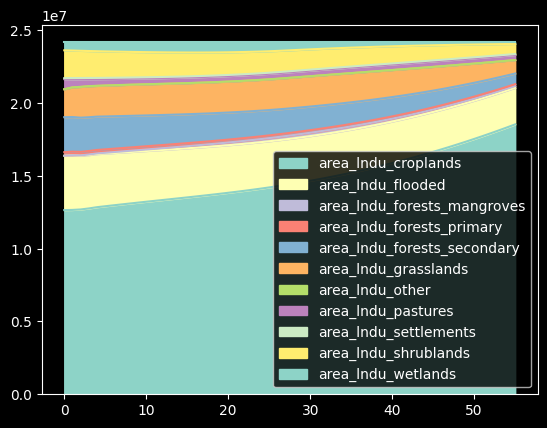

In [48]:
modvar = matt.get_variable("Land Use Area")
modvar.get_from_dataframe(df_out[df_out["primary_id"].isin([0])]).plot.area()

(<Figure size 1800x1200 with 1 Axes>, <Axes: >)

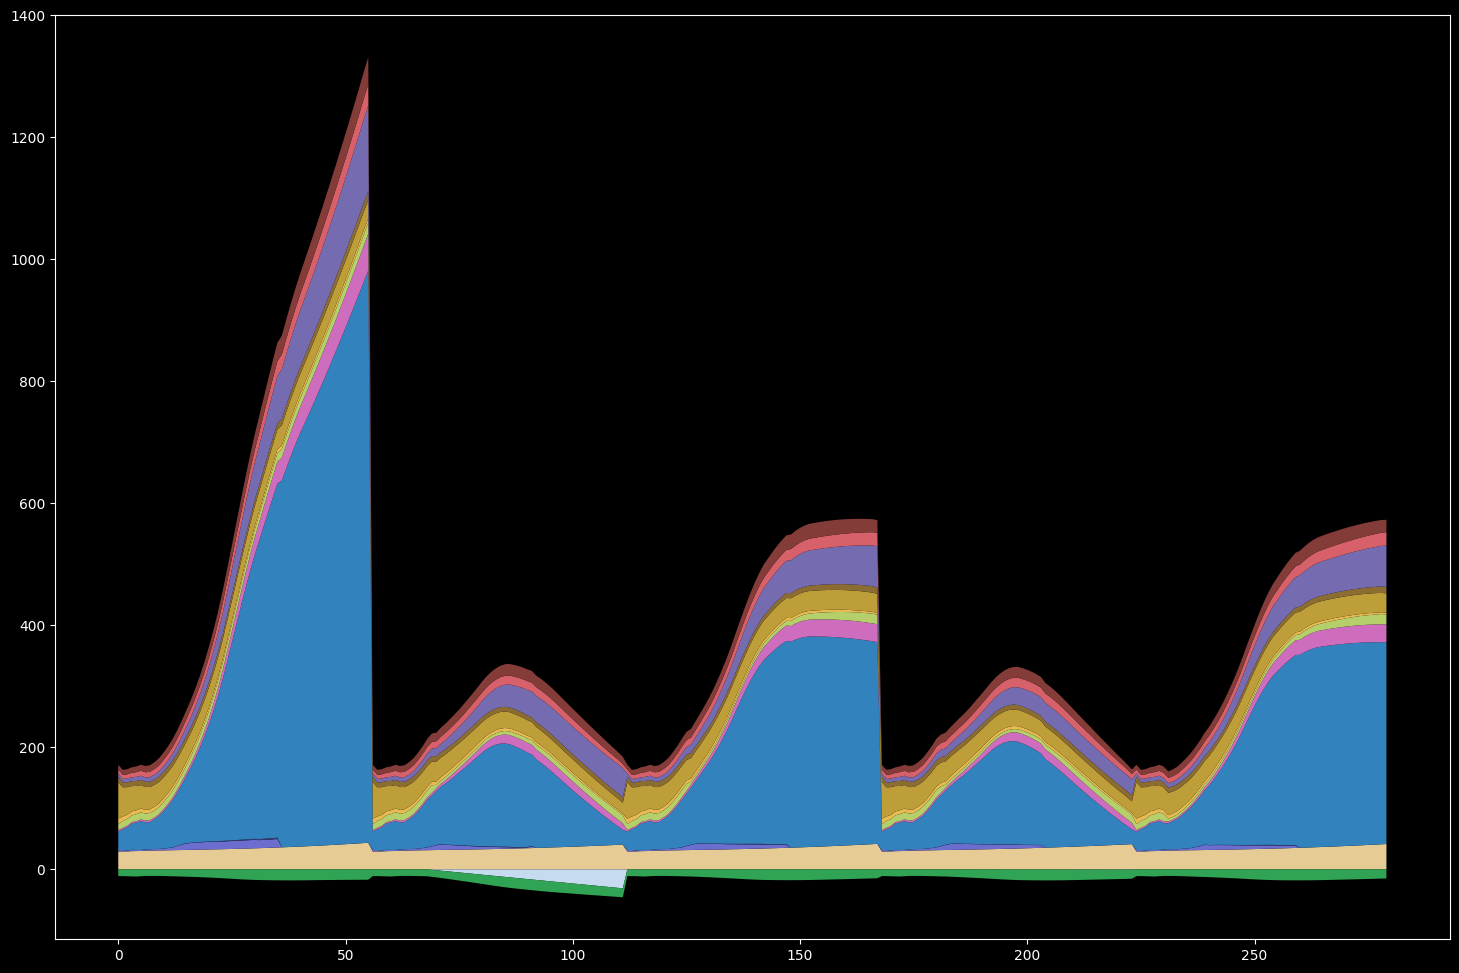

In [50]:
spp.plot_emissions_stack(
    df_out,#[["emission_co2e_subsector_total_lndu"]],
    ssp.model_attributes,
)

# Code to build NDC that starts in 2020 (retroactive)
- Pull our CCDR analysis
- Copy all transformations but set the start date to 2020 ($t_0 = 5$ for transformations)


In [ ]:
_CODE_NDC = "PFLO:NDC"

# get the strategy and extract transformations
strat_ndc_ccdr = strategies.get_strategy(_CODE_NDC)
transformations_ndc_ccdr = strat_ndc_ccdr.get_transformation_list(
    strat_ndc_ccdr.transformation_specification,
    strategies.transformations,
)

all_codes_ndc = [x.code for x in transformations_ndc_ccdr]

In [313]:
def copy_to_ndc_two(
    transformations: 'Transformations',
    all_codes_ndc: List[str],
    export: bool = False,
    key_tp0: str = "tp_0_ramp",
    key_vir: str = "vec_implementation_ramp",
) -> None:
    """Copy NDC transformations to NDC 2.0 with time starting in 2020
    """
    paths_transformations_cur = transformations.dict_paths.get(
        transformations.key_path_transformations, 
    )

    all_codes_ndc2 = []

    # iterate over each path
    for path in paths_transformations_cur:

        # get and check the code associated with this YAML
        transformation = trf.Transformation(
            path,
            transformations.transformers,
        )
        
        # skip any non-ndc transformations
        if transformation.code not in all_codes_ndc:
            continue


        ##  UPDATE YAML - START WITH IMPLEMENTATION RAMP
            
        # get the parameters and update the start time
        dict_yaml = sf.read_yaml(path, munchify_dict = False, )
        dict_params = dict_yaml.get(transformation.key_parameters, )

        # get the ramp from parameters and update as necessary
        vramp = dict_params.get(key_vir)
        dict_component = {key_tp0: 5}
        
        if isinstance(vramp, dict):
            vramp.update(dict_component)
        else:
            vramp = dict_component

        # update param dict and YAML
        dict_params.update({key_vir: vramp, })
        dict_yaml.update({transformation.key_parameters: dict_params, })

        # 
        dict_ids = dict_yaml.get(transformation.key_identifiers, )

        # update the code
        code = dict_ids.get(transformation.key_transformation_code, )
        append = "2020" if code.endswith("_NDC") else "_NDC2020"
        code = f"{code}{append}"
        dict_ids.update({transformation.key_transformation_code: code, })

        # update the name
        name = dict_ids.get(transformation.key_transformation_name, )
        name = f"{name} with year starting in 2020 to reflect NDC 2.0"
        dict_ids.update({transformation.key_transformation_name: name, })

        dict_yaml.update({transformation.key_identifiers: dict_ids, })

        
        ##  SET OUTPUT PATH AND EXPORT
        
        path_out = path.stem
        append = "2020" if path_out.endswith("_NDC") else "_NDC2020"
        path_out = f"{path_out}{append}{path.suffix}"
        path_out = path.parents[0].joinpath(path_out)
        
        # write output?
        if export: sf._write_yaml(dict_yaml, path_out, )

        # finally, add to all codes to build new strategy
        all_codes_ndc2.append(code)

    
    all_codes_ndc2.sort()

    return all_codes_ndc2






all_codes_ndc2 = copy_to_ndc_two(
    transformations, 
    all_codes_ndc,
    export = True, 
)

In [184]:
_STRAT_ID_NEW = 6007

# get the current table
tab = strategies.attribute_table.table
tab = tab[
    ~tab[strategies.key_strategy].isin([_STRAT_ID_NEW])
]

# add a new row
row_new = {
    strategies.key_strategy: _STRAT_ID_NEW,
    strategies.field_strategy_code: "PFLO:NDC_2_2020_START",
    strategies.field_strategy_name: "NDC 2.0 (2020  Start)",
    strategies.field_description: "NDC with start date of 2020; reflects original specification of NDC 2.0", 
    strategies.field_transformation_specification: "|".join(all_codes_ndc2),
    strategies.field_baseline_strategy: 0
}

tab = (
    pd.concat(
        [
            tab,
            pd.DataFrame(pd.Series(row_new)).transpose(),
        ],
        axis = 0,
    )
    .sort_values(by = [strategies.key_strategy])
    .reset_index(drop = True, )
)

# export?
if True:
    tab.to_csv(
        strategies.path_strategy_definition,
        encoding = "UTF-8",
        index = None,
    )

In [245]:
d1 = {"a": [1, 2], "b": [2, 3, 5]}
sum(d1.values(), [])

[1, 2, 2, 3, 5]

In [288]:




dict_summaries = generate_summary_files(None, export = True, )
    
    

In [292]:
df = dict_summaries.get("WIDE_INPUTS_OUTPUTS")
df_primary = dict_summaries.get("ATTRIBUTE_PRIMARY")
df_strategy = dict_summaries.get("ATTRIBUTE_STRATEGY")

In [308]:
df_strategy[
    df_strategy[ssp.key_strategy].isin(
        df_primary[ssp.key_strategy].unique()
    )
]

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,None,TX:BASE,1
68,6002,PFLO:ALL,All Actions,All actions (unique by transformer),TX:AGRC:DEC_CH4_RICE|TX:AGRC:DEC_EXPORTS|TX:AG...,0
69,6003,PFLO:NDC,NDC,NDC,TX:AGRC:DEC_CH4_RICE_STRATEGY_NDC|TX:AGRC:INC_...,0
70,6004,PFLO:NZ,NZ,Net Zero,TX:SCOE:DEC_DEMAND_HEAT_STRATEGY_NZ|TX:AGRC:DE...,0
73,6007,PFLO:NDC_2_2020_START,NDC 2.0 (2020 Start),NDC with start date of 2020; reflects original...,TX:AGRC:DEC_CH4_RICE_STRATEGY_NDC2020|TX:AGRC:...,0


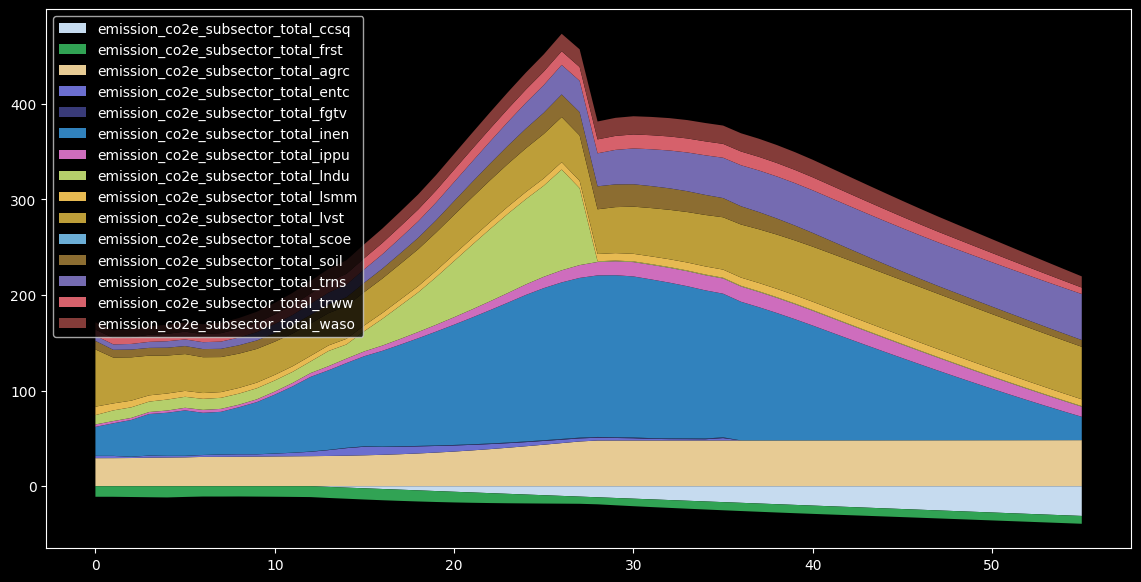

In [312]:
import sisepuede.plotting.plots as spp

fig, ax = plt.subplots(figsize = (14, 7))
spp.plot_emissions_stack(
    df[df[ssp.key_primary].isin([68068])],
    ssp.model_attributes,
    figtuple = (fig, ax, )
)
ax.legend()


(<Figure size 1800x1200 with 1 Axes>, <Axes: >)

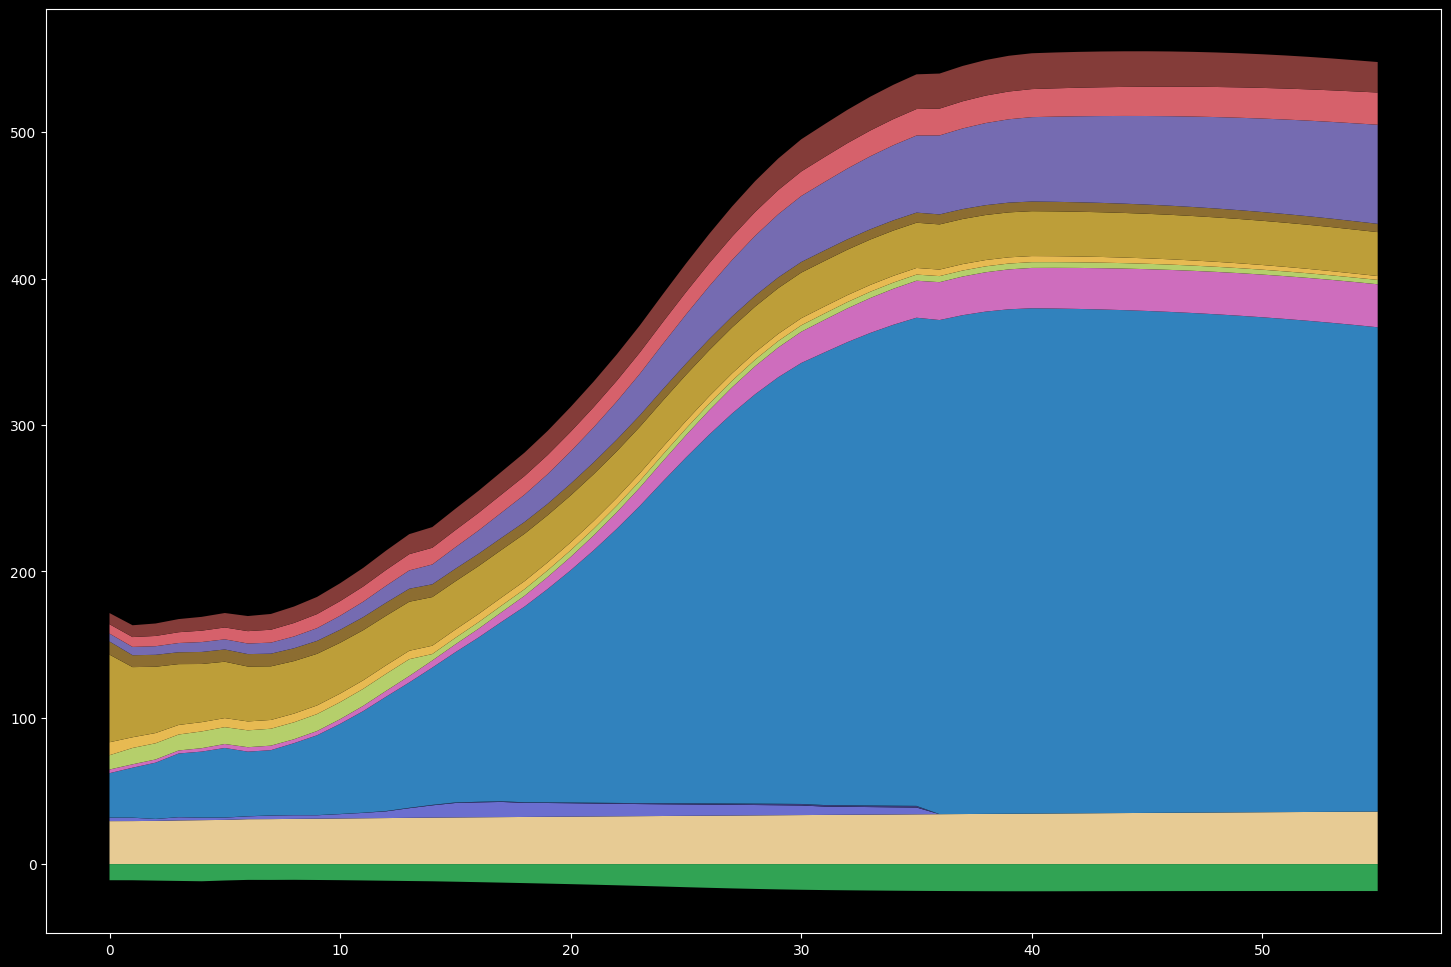

In [307]:
import sisepuede.plotting.plots as spp
spp.plot_emissions_stack(
    df[df[ssp.key_primary].isin([69069])],
    ssp.model_attributes
)